In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2
import datajoint as dj; dj.conn().connect()
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis, histology, ccf
from pipeline.plot import unit_psth
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice
import pandas as pd

/home/jupyter/map-ephys


[2022-10-11 22:24:18,038][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2022-10-11 22:24:18,094][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


# Ephys examples

## Probe insertions

In [26]:
    foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol=100')
    df_sessions = pd.DataFrame((experiment.Session
                                & foraging_sessions
                                * lab.WaterRestriction.proj('water_restriction_number')
                                ).fetch()
                              )
    df_sessions

subject_id  session session_date    session_time username  \
0         447921        1   2019-09-11 0 days 13:56:46       NT   
1         447921        2   2019-09-12 0 days 21:25:47       NT   
2         447921        3   2019-09-13 0 days 15:52:49       NT   
3         447921        4   2019-09-14 0 days 15:32:03       NT   
4         447921        5   2019-09-15 0 days 12:27:12       NT   
...          ...      ...          ...             ...      ...   
1754      632110        9   2022-08-17 0 days 10:15:19    Lucas   
1755      632110       10   2022-08-18 0 days 10:03:04    Lucas   
1756      632110       11   2022-08-19 0 days 09:35:43    Lucas   
1757      632110       12   2022-08-20 0 days 18:34:52    Kenta   
1758      632110       13   2022-08-21 0 days 16:56:00    Kenta   

                   rig  
0     Training-Tower-3  
1     Training-Tower-3  
2     Training-Tower-3  
3     Training-Tower-3  
4     Training-Tower-3  
...                ...  
1754      AIND-Tower-3  
1755      AIND-Tower-3  
1756      AIND-Tower-3  
1757      AIND-Tower-1  
1758      AIND-Tower-1  

[1759 rows x 6 columns]

In [27]:
foraging_sessions & ephys.ProbeInsertion

*subject_id    *session    session_task_protocol     session_real_foraging    
+------------+ +---------+ +-----------------------+ +-----------------------+
473360         49          100                       1                        
473360         50          100                       1                        
473360         51          100                       1                        
473360         52          100                       1                        
473360         53          100                       1                        
473361         42          100                       1                        
473361         46          100                       1                        
473361         47          100                       1                        
473361         48          100                       1                        
473361         50          100                       1                        
473361         57          100                       1                        
473361         58          100                       1                        
473361         59          100                       1                        
473361         60          100                       1                        
473361         61          100                       1                        
482353         33          100                       1                        
482353         34          100                       1                        
482353         36          100                       1                        
482353         37          100                       1                        
482353         42          100                       1                        
482353         43          100                       1                        
482353         44          100                       1                        
482353         45          100                       1                        
490931         22          100                       1                        
490931         23          100                       1                        
490932         26          100                       1                        
490932         27          100                       1                        
494691         17          100                       1                        
494691         18          100                       1                        
494691         19          100                       1                        
   ...
 (Total: 37)

In [96]:
foraging_sessions.proj() * ephys.ProbeInsertion

*subject_id    *session    *insertion_number    probe           probe_type               electrode_config_name         
+------------+ +---------+ +------------------+ +-------------+ +----------------------+ +----------------------------+
473360         49          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473360         49          2                    18005108622     neuropixels 1.0 - 3B     1-384                         
473360         50          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473360         50          2                    18005108622     neuropixels 1.0 - 3B     1-384                         
473360         51          1                    18005108622     neuropixels 1.0 - 3B     1-384                         
473360         51          2                    18005123491     neuropixels 1.0 - 3B     1-384                         
473360         51          3                    19122505354     neuropixels 2.0 - SS     1-384                         
473360         52          1                    18005108622     neuropixels 1.0 - 3B     1-384                         
473360         52          2                    18005123491     neuropixels 1.0 - 3B     1-384                         
473360         52          3                    18005117122     neuropixels 1.0 - 3B     1-384                         
473360         53          1                    18005108622     neuropixels 1.0 - 3B     1-384                         
473360         53          2                    18194809061     neuropixels 1.0 - 3B     1-384                         
473360         53          3                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         42          1                    17131309211     neuropixels 1.0 - 3B     1-384                         
473361         46          1                    18005108622     neuropixels 1.0 - 3B     1-384                         
473361         46          2                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         47          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         47          2                    19122516811     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         48          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         48          2                    19122516691     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         50          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         50          2                    19122516811     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         57          1                    19122516811     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         57          2                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         58          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         58          2                    19122516811     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         59          1                    19122516811     neuropixels 2.0 - MS     1-96; 1281-1376; 2561-2656; 38
473361         59          2                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         60          1                    18005123491     neuropixels 1.0 - 3B     1-384                         
473361         60          2                    18005108622     neuropixels 1.0 - 3B     1-384                         
   ...
 (Total: 83)

In [138]:
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol=100').proj()
insertion_numbers = foraging_sessions.proj().aggr(foraging_sessions * ephys.ProbeInsertion, ..., 
                                                  keep_all_rows=True, ephys_insertions='IF(COUNT(insertion_number), "yes", "no")')
df_sessions = pd.DataFrame(((experiment.Session & foraging_sessions)
                            * lab.WaterRestriction.proj('water_restriction_number')
                            * insertion_numbers
                            ).fetch()
                        ) 

In [139]:
df_sessions

subject_id  session session_date    session_time username  \
0         447921       38   2019-11-01 0 days 12:26:38       NT   
1         447921       37   2019-10-31 0 days 10:50:31       NT   
2         447921       36   2019-10-30 0 days 12:29:27       NT   
3         447921       35   2019-10-29 0 days 13:20:30       NT   
4         447921       34   2019-10-28 0 days 10:19:40       NT   
...          ...      ...          ...             ...      ...   
1755      632110        5   2022-08-11 0 days 12:04:59    Kenta   
1756      632110        4   2022-08-10 0 days 12:02:34    Kenta   
1757      632110        3   2022-08-09 0 days 11:11:06    Kenta   
1758      632110        2   2022-08-08 0 days 11:54:48    Kenta   
1759      632110        1   2022-08-05 0 days 13:52:37    Kenta   

                   rig water_restriction_number ephys_insertions  
0     Training-Tower-3                     HC16               no  
1     Training-Tower-3                     HC16               no  
2     Training-Tower-3                     HC16               no  
3     Training-Tower-3                     HC16               no  
4     Training-Tower-3                     HC16               no  
...                ...                      ...              ...  
1755      AIND-Tower-2                  KH_FB36               no  
1756      AIND-Tower-2                  KH_FB36               no  
1757      AIND-Tower-1                  KH_FB36               no  
1758      AIND-Tower-2                  KH_FB36               no  
1759      AIND-Tower-2                  KH_FB36               no  

[1760 rows x 8 columns]

## Histology-related

`ephys.Unit`: all units

`histology.ElectrodeCCFPosition.ElectrodePosition`: CCF location for each unit

`ccf.CCFAnnotation`: Annotation for each CCF location

Count units in each area

In [2]:
dj.U('annotation').aggr((ephys.Unit * histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation, count='count(*)').fetch(format='frame', order_by='count desc')[:10]

count
annotation                                
Caudoputamen                         30221
Secondary motor area, layer 5        19607
arbor vitae                          18867
Intermediate reticular nucleus       18607
Midbrain reticular nucleus           14389
Lobules IV-V                         13608
Parvicellular reticular nucleus      11508
Orbital area, lateral part, layer 5  11441
Gigantocellular reticular nucleus    10758
Midbrain                              9606

After unit QC (quite stringent)

In [4]:
foraging_session = experiment.Session & 'username = "hh"'
all_unit_qc = (ephys.Unit * ephys.ClusterMetric * ephys.UnitStat) & foraging_session & 'presence_ratio > 0.95' & 'amplitude_cutoff < 0.1' & 'isi_violation < 0.5' & 'unit_amp > 70'
dj.U('annotation').aggr(((ephys.Unit & all_unit_qc.proj()) * histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation, count='count(*)').fetch(format='frame', order_by='count desc')[:10]

count
annotation                                              
Lateral septal nucleus, rostral (rostroventral)...   325
Secondary motor area, layer 6a                       289
Prelimbic area, layer 5                              286
Anterior cingulate area, ventral part, layer 5       153
Anterior olfactory nucleus                           135
Anterior cingulate area, dorsal part, layer 5        132
Orbital area, medial part, layer 5                   118
Caudoputamen                                         116
Lateral septal nucleus, ventral part                 103
Orbital area, ventrolateral part, layer 5             98

All unit in Prelimbic area after QC

In [5]:
unit_qc_prelimbic = (all_unit_qc * histology.ElectrodeCCFPosition.ElectrodePosition * ccf.CCFAnnotation) & 'annotation LIKE "Prelimbic%"'

Unique `session` and `insertion_number` that contains Prelimbic area for Mouse HH09

(`insertion_number` could be 1, 2, or 3.  I can insert three probes at most on my current rig.)

In [ ]:
dj.U('session', 'insertion_number') & (unit_qc_prelimbic & (lab.WaterRestriction & 'water_restriction_number = "HH09"'))

Finally, all QC-filtered prelimbic units for Mouse HH09 in Session 47.

In [ ]:
unit_qc_prelimbic_HH09_session47 = unit_qc_prelimbic & (lab.WaterRestriction & 'water_restriction_number = "HH09"') & 'session = 47'
len(unit_qc_prelimbic_HH09_session47)

## PSTH

Pick an example neuron

In [55]:
h2o, date, imec, unit = 'HH16', '2021-12-09', 0, 483
unit_key = ((ephys.Unit() & (experiment.Session & f'session_date = "{date}"') & (lab.WaterRestriction & f'water_restriction_number="{h2o}"')) & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

In [ ]:
from pipeline.plot import foraging_model_plot
_ = foraging_model_plot.plot_unit_all_in_one(unit_key)

In [ ]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe')

PSTH grouped by choice and outcome

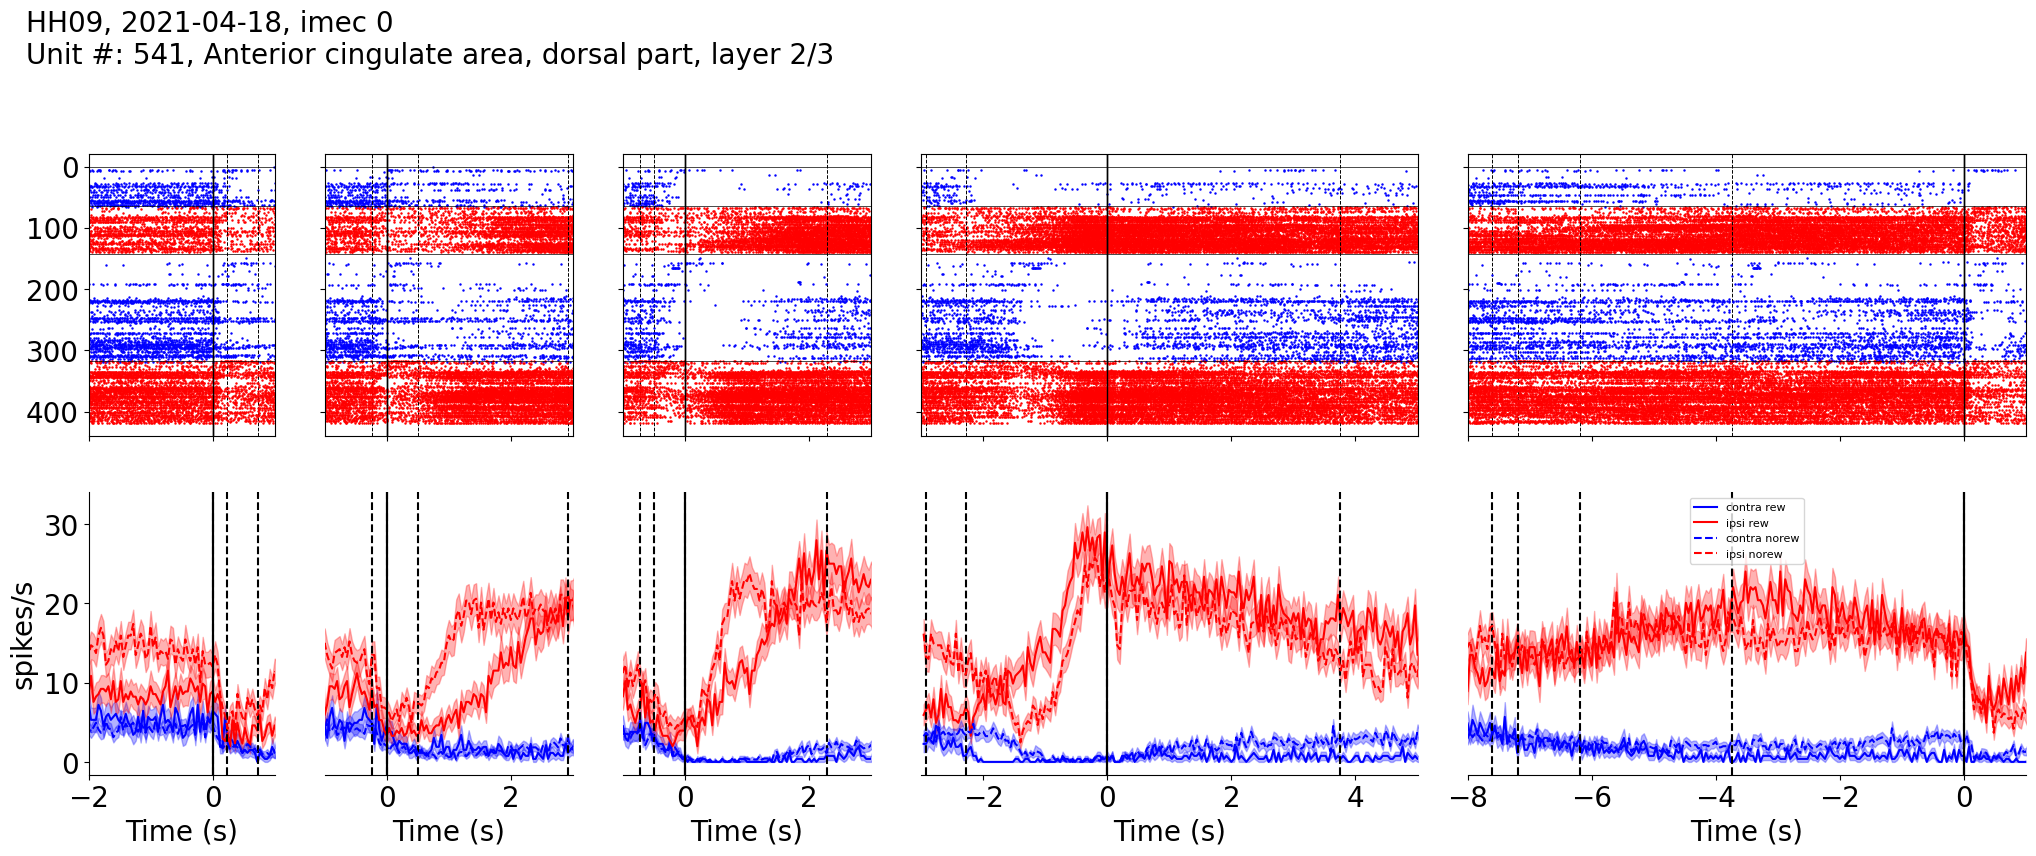

In [68]:
_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)

PSTH grouped by quantiles of `action value`. Note that this depends on the behavioral model. (see the next section)

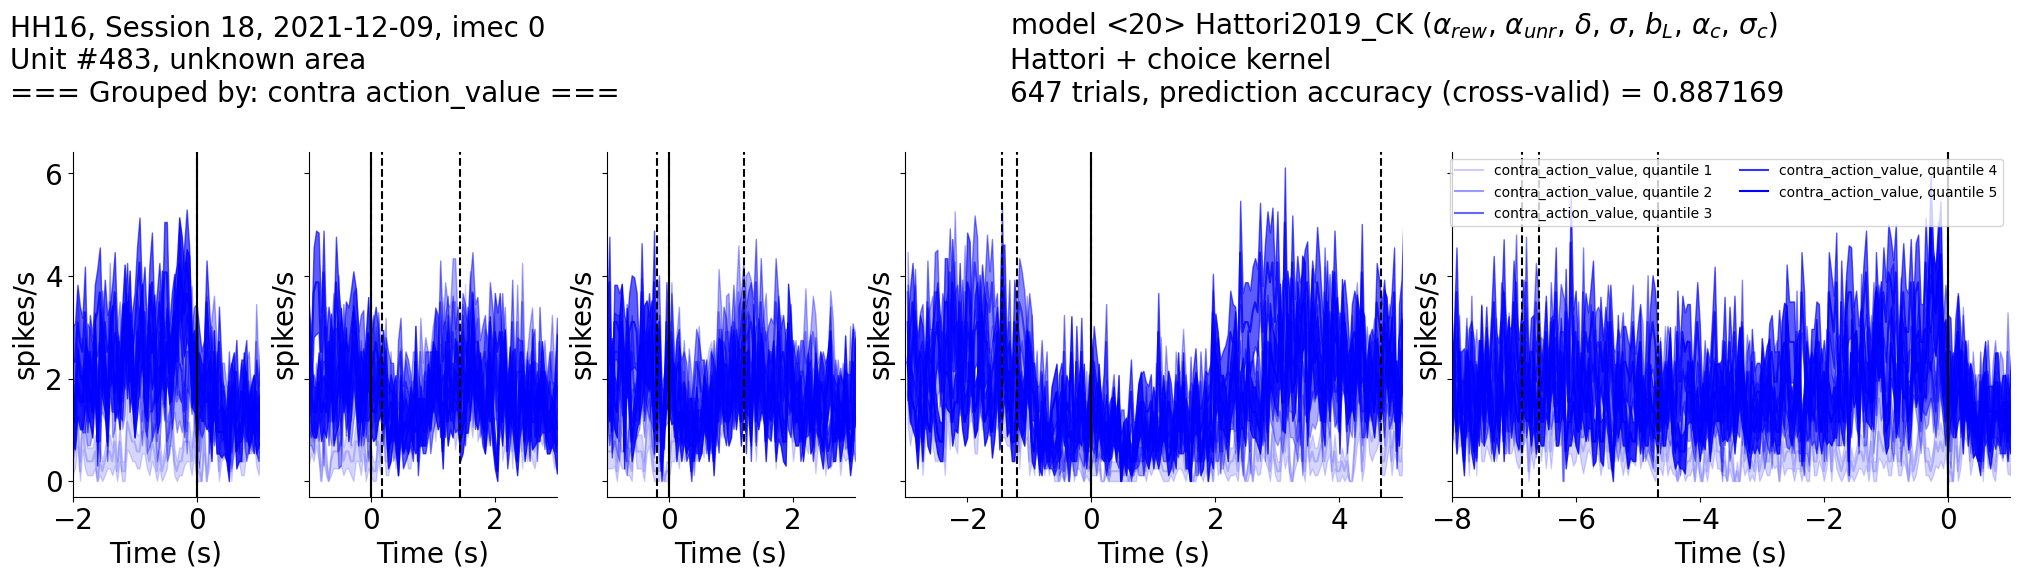

In [58]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=20, if_sem=1)

By default, `plot_unit_psth_latent_variable_quantile` plots `contralateral action value`.

You can specify other latent variables, such as `ipsi_action_value`, `contra_choice_prob`, `relative_action_value_ic` (contra-ipsi), `total_action_value`, `contra_choice_kernel` etc.

For example, ipsilateral choice probability:

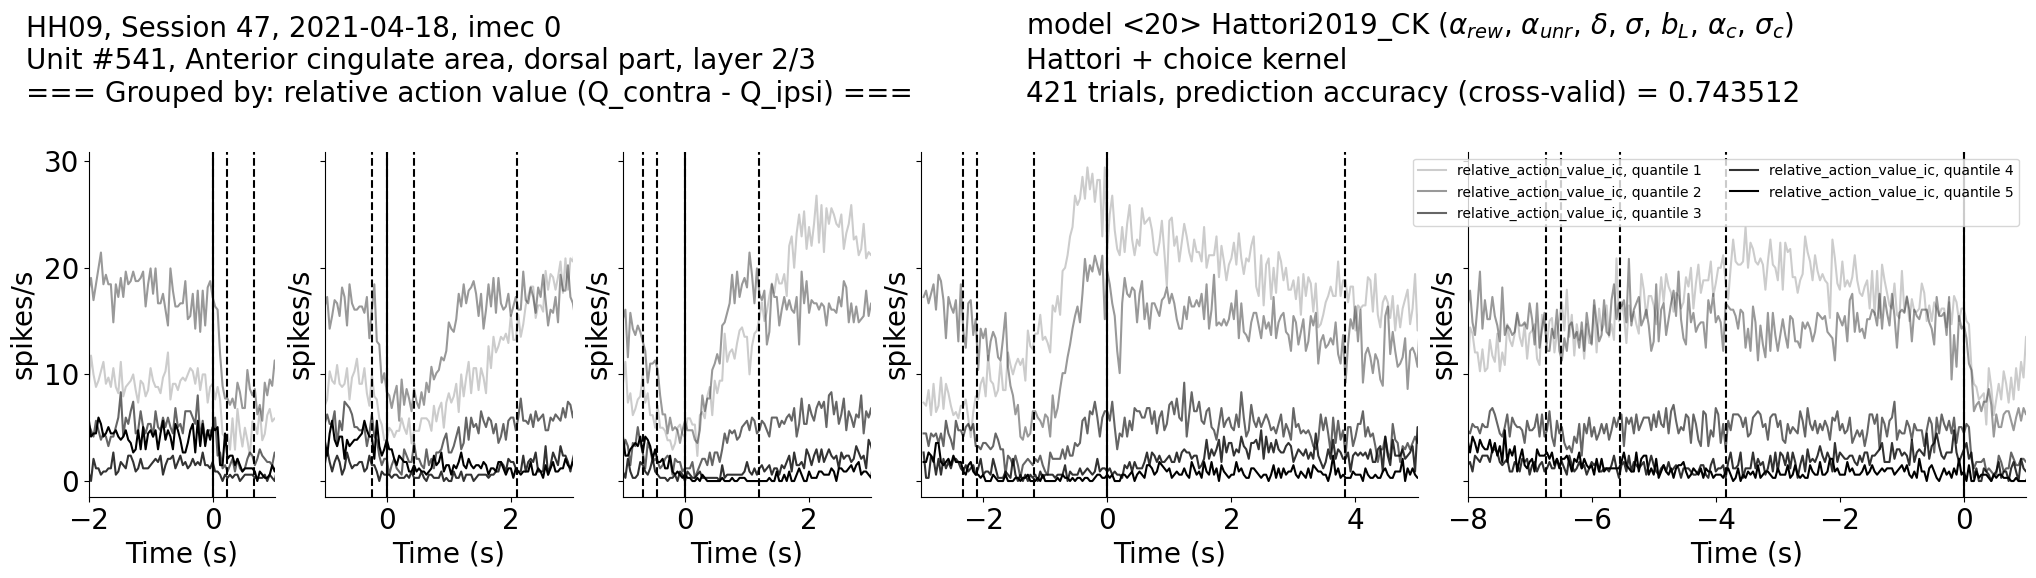

In [67]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=20, latent_variable='relative_action_value_ic', if_sem=0)

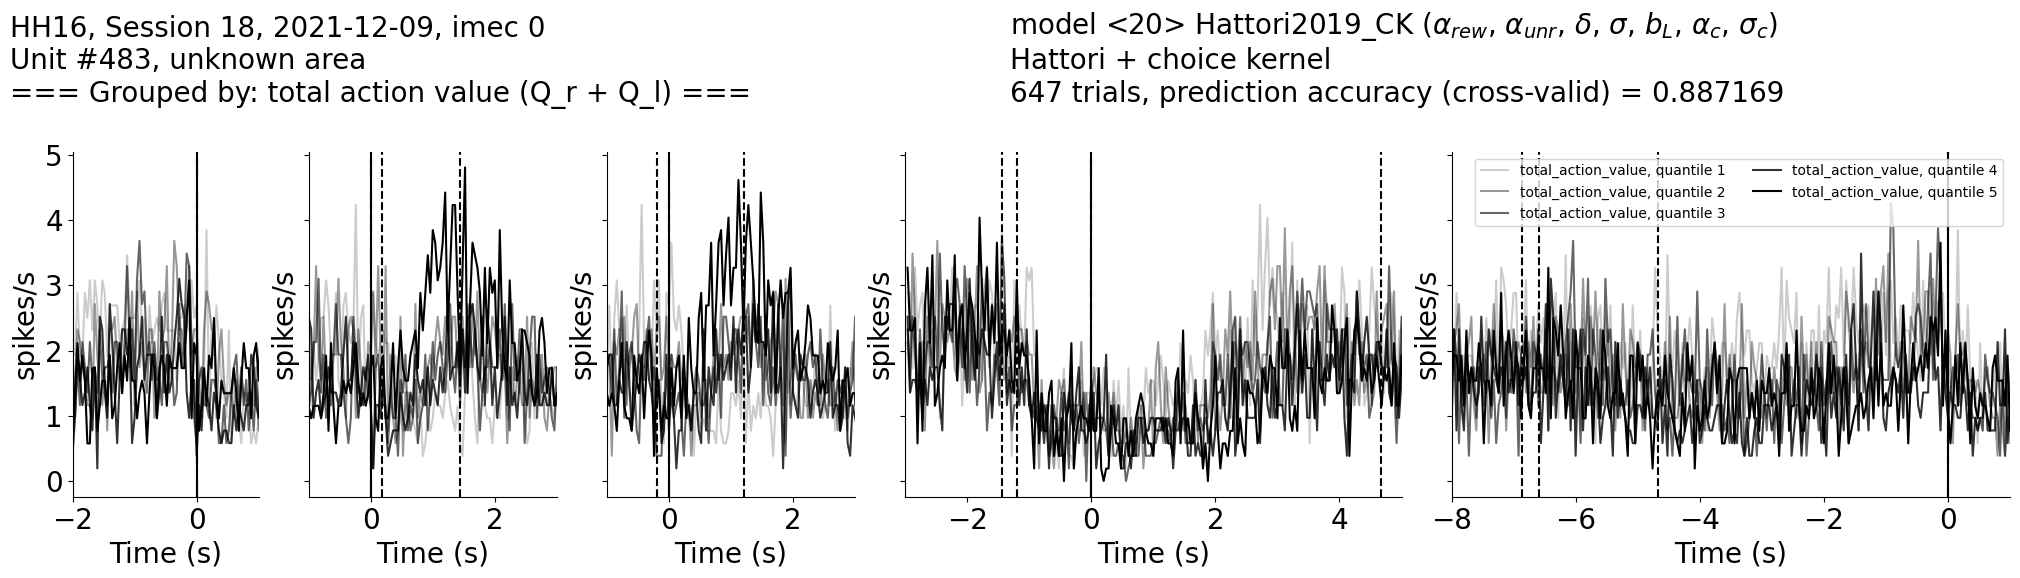

In [59]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=20, latent_variable='total_action_value', if_sem=0)

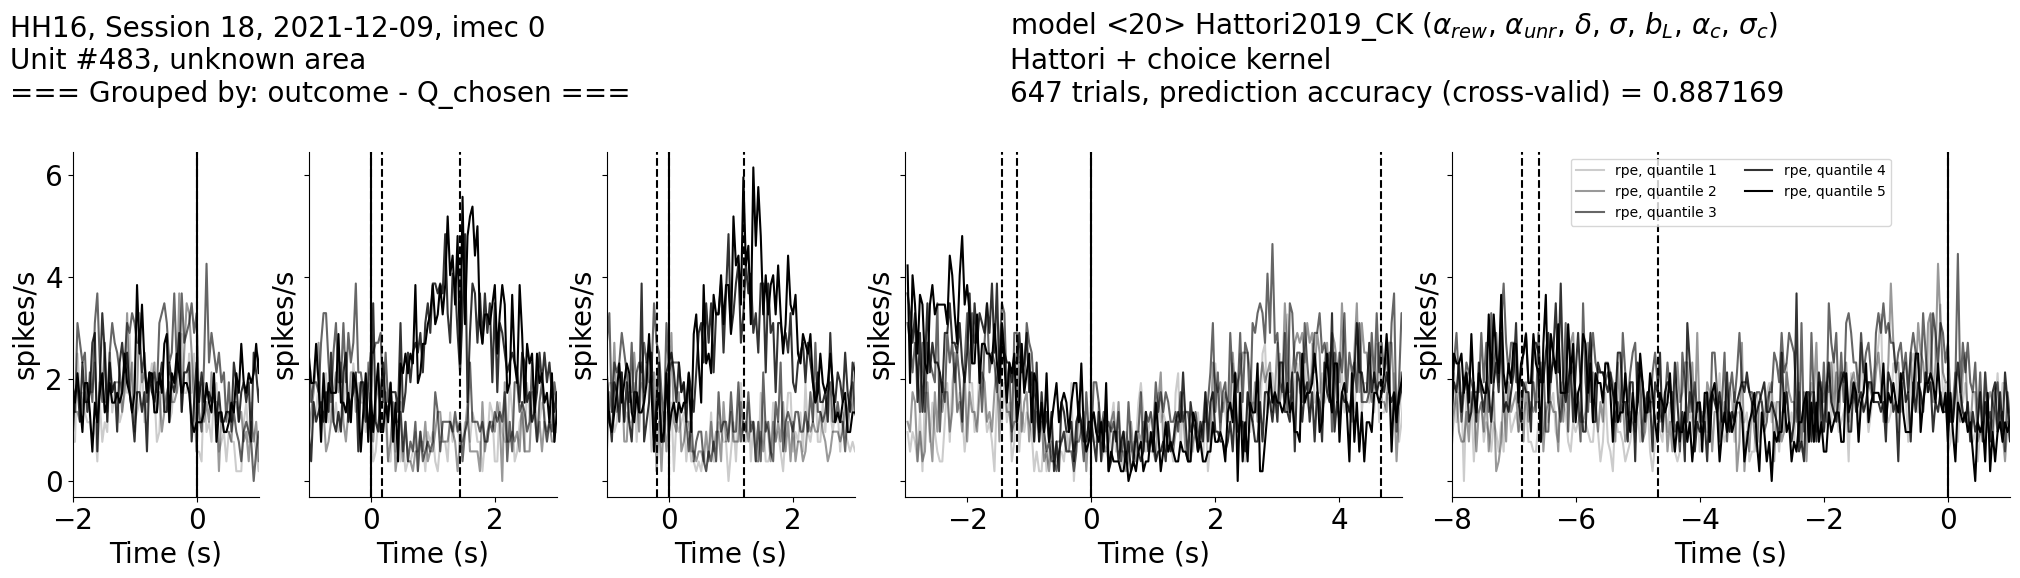

In [60]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=20, latent_variable='rpe', if_sem=0)

## Spike count over trials VS latent variables

In [62]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() & (experiment.Session & 'session_date = "2021-04-18"' & 'subject_id = 473361') & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

Function `unit_psth.plot_unit_period_tuning` plots spike counts in user-defined `period` over trials and do simple linear fitting against latent variables.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


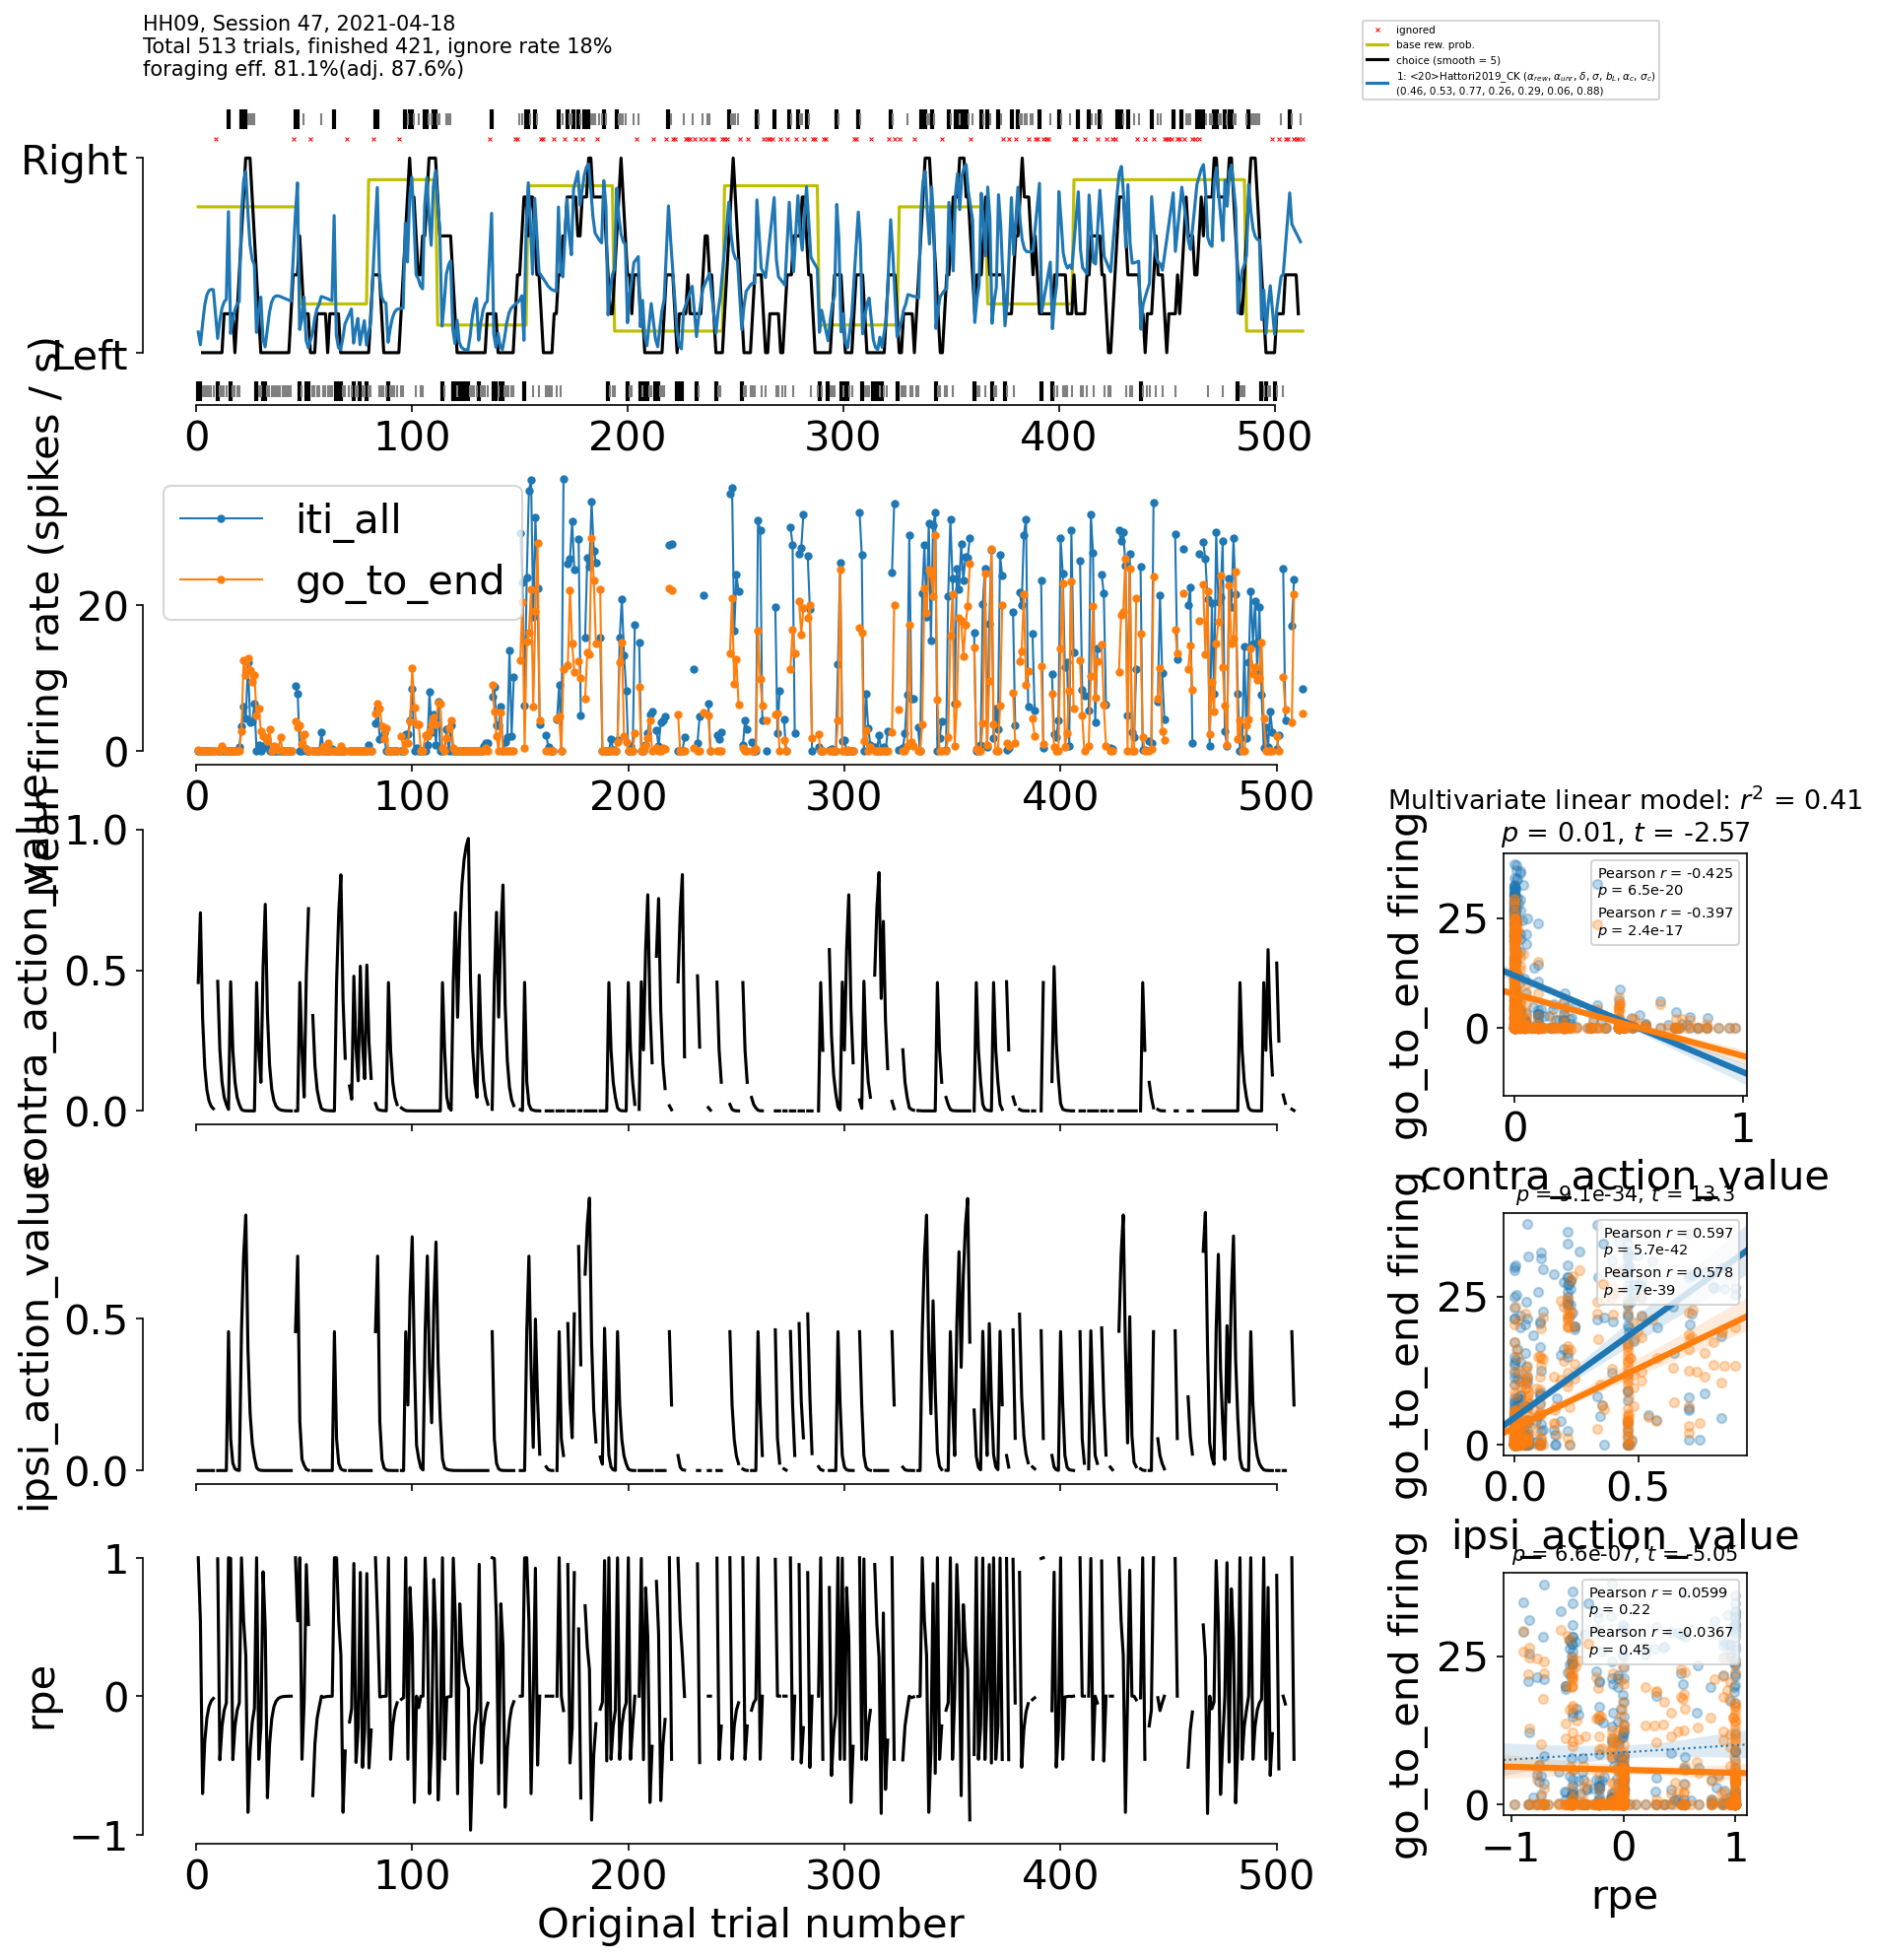

In [64]:
_ = unit_psth.plot_unit_period_tuning(unit_key, model_id=20, independent_variable = ['contra_action_value', 'ipsi_action_value', 'rpe'])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


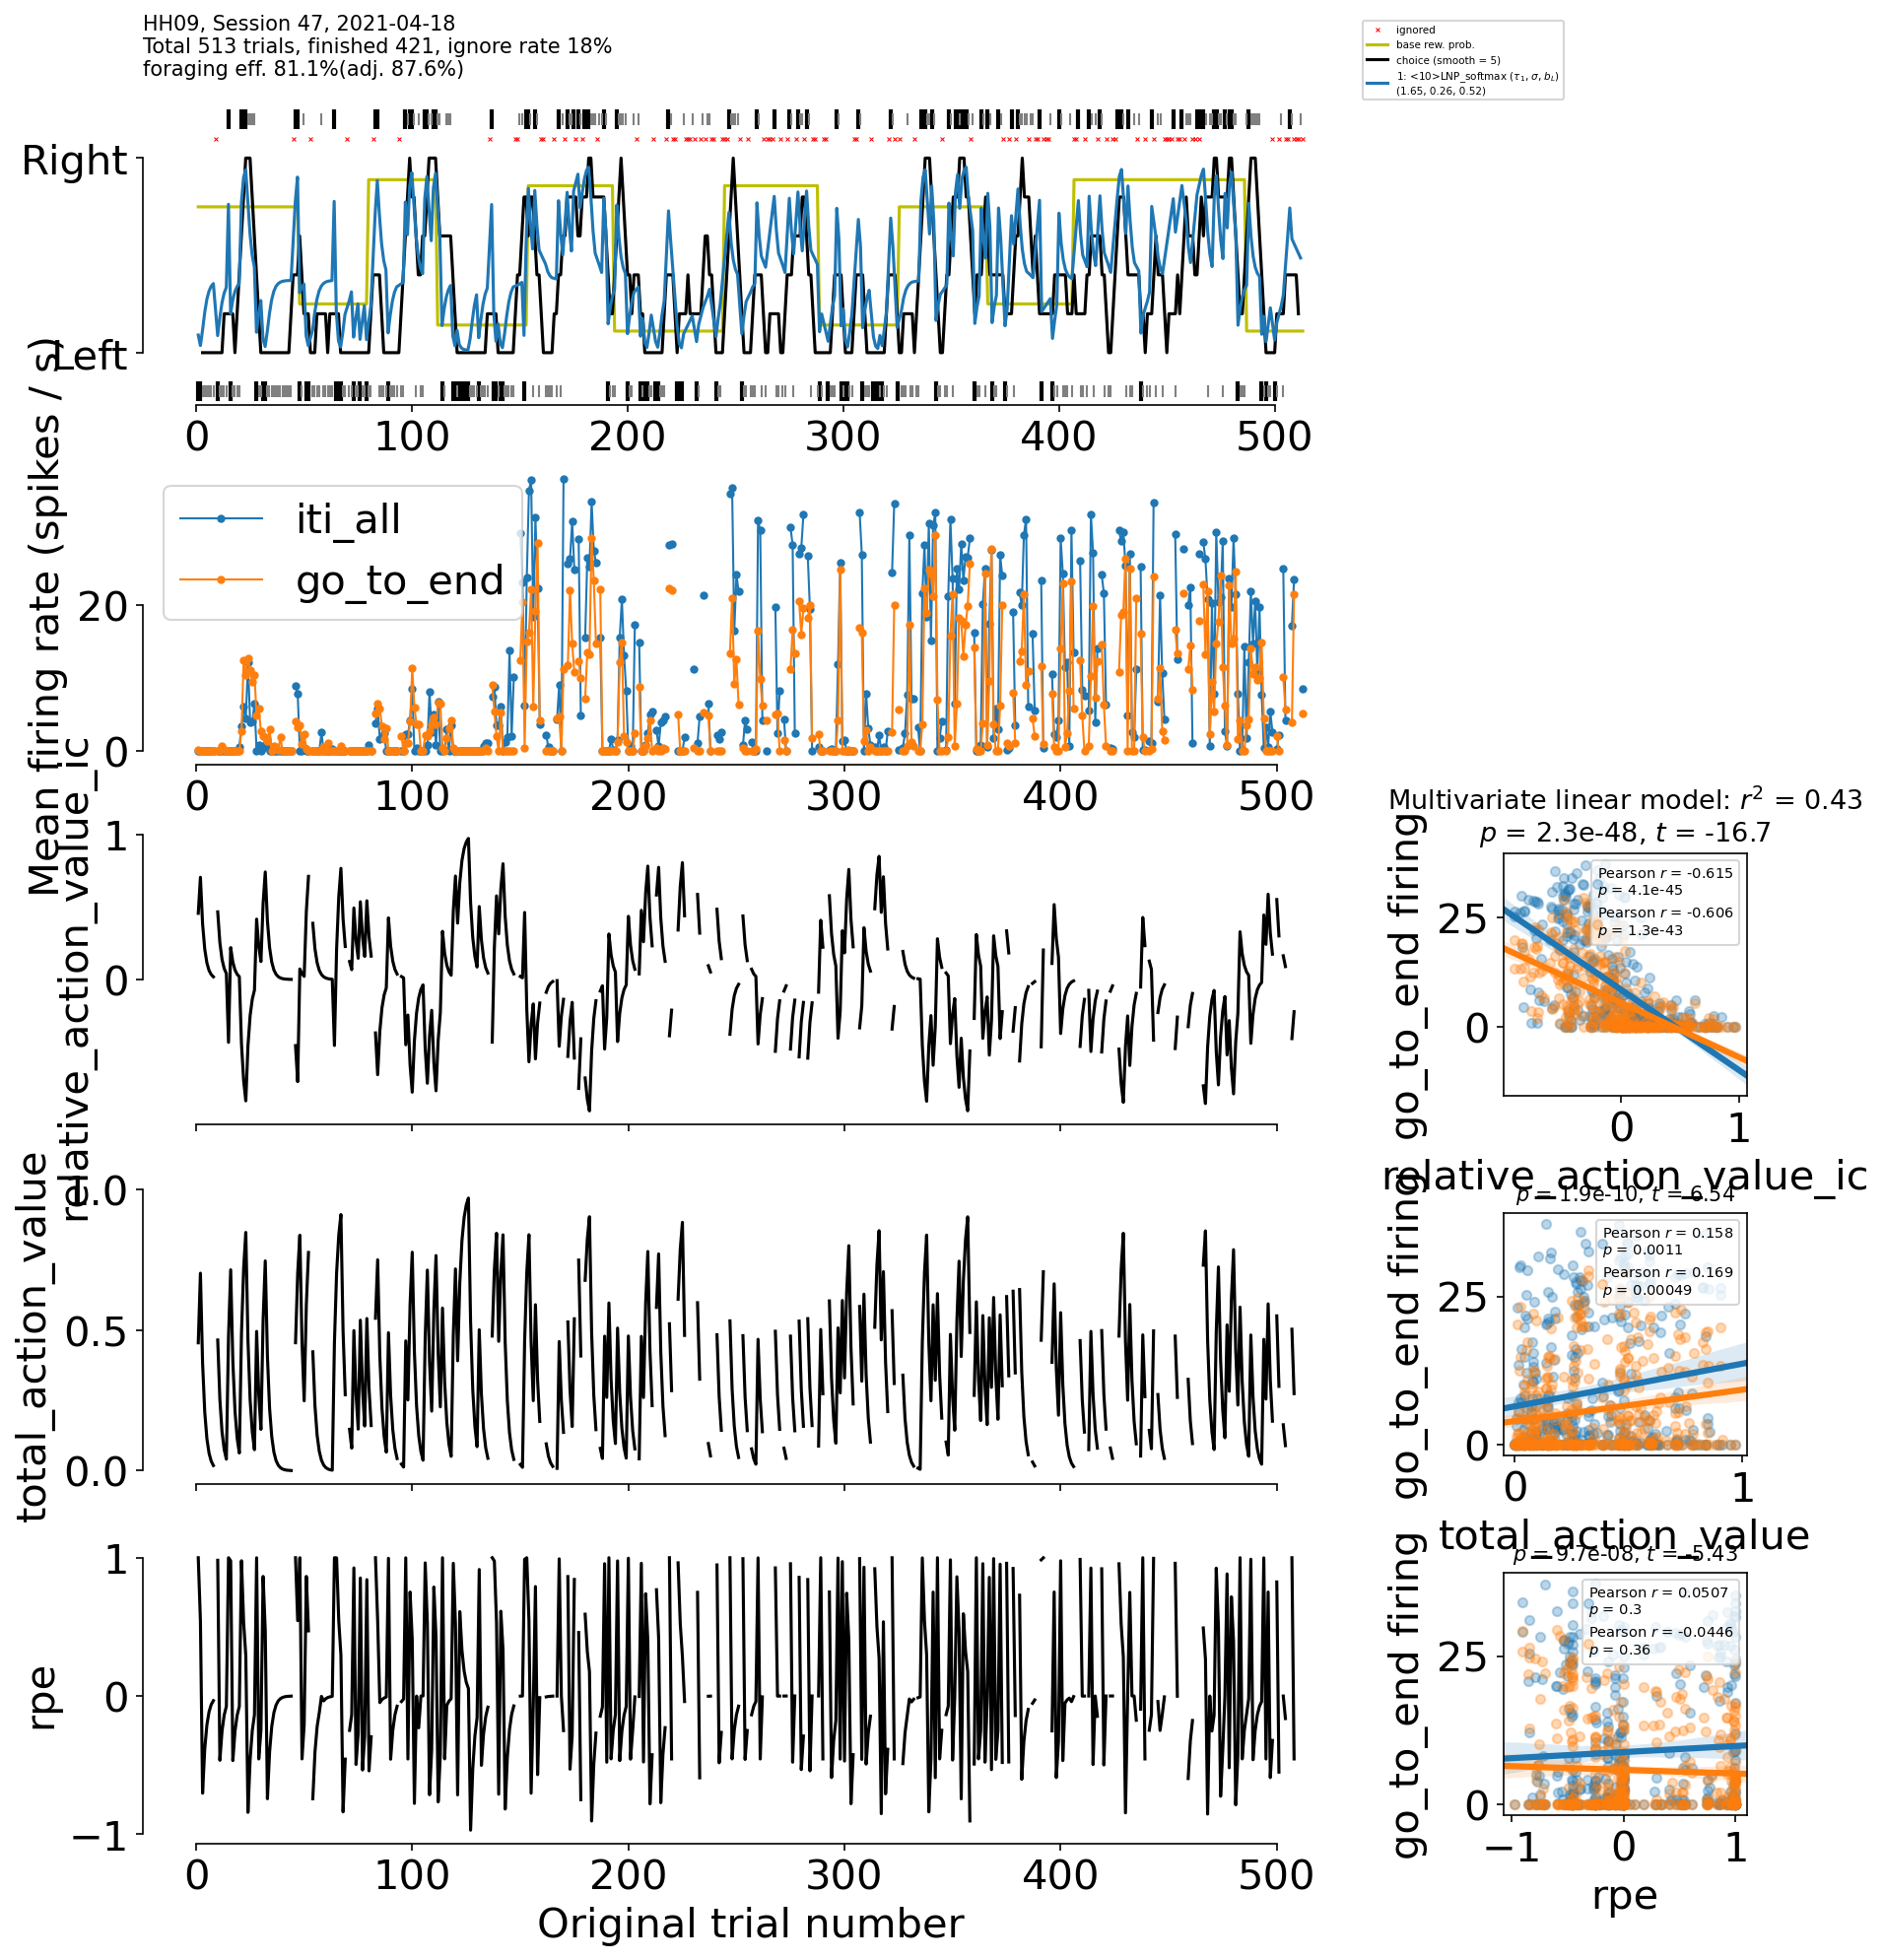

In [65]:
_ = unit_psth.plot_unit_period_tuning(unit_key, model_id=10, independent_variable = ['relative_action_value_ic', 'total_action_value', 'rpe'])

## Noise correlation

As the first step of computing noise correlation, we can use `psth_foraging.compute_unit_period_activity` to get spike counts over trials for each unit.

In [10]:
from pipeline import psth_foraging

In [ ]:
psth_foraging.compute_unit_period_activity(unit_key=unit_key, period='iti_all')

Get raw raster (example from `pipeline\plot\unit_psth\plot_unit_psth_choice_outcome`)

In [ ]:
left_hit_trials = psth_foraging.TrialCondition.get_trials('R_hit', 0) & unit_key
left_hit_unit_psth = psth_foraging.compute_unit_psth_and_raster(unit_key, left_hit_trials, align_type='iti_start')
left_hit_unit_psth.keys()

In [22]:
left_hit_unit_psth['psth_per_trial'].shape

(66, 324)

The example above selects trials according to choice and outcome. 

If you want to get all trials, use this

In [37]:
all_unit_psth = psth_foraging.compute_unit_psth_and_raster(unit_key, experiment.BehaviorTrial & unit_key, align_type='iti_start')
all_unit_psth['psth_per_trial'].shape

(513, 324)

Or, if you want to select trials according to other variables such as action value, this will be helpful:

In [33]:
from pipeline.util import _get_unit_independent_variable
df = _get_unit_independent_variable(unit_key, model_id=10)
df

trial  subject_id  session  model_id left_ right_ contra_  ipsi_  \
0        1      473361       47        10  left  right    left  right   
1        2      473361       47        10  left  right    left  right   
2        3      473361       47        10  left  right    left  right   
3        4      473361       47        10  left  right    left  right   
4        5      473361       47        10  left  right    left  right   
..     ...         ...      ...       ...   ...    ...     ...    ...   
416    503      473361       47        10  left  right    left  right   
417    504      473361       47        10  left  right    left  right   
418    507      473361       47        10  left  right    left  right   
419    508      473361       47        10  left  right    left  right   
420    512      473361       47        10  left  right    left  right   

     left_action_value  right_action_value  ...  ipsi_choice_kernel  \
0             0.455350            0.000000  ...                 NaN   
1             0.703356            0.000000  ...                 NaN   
2             0.383083            0.000000  ...                 NaN   
3             0.208646            0.000000  ...                 NaN   
4             0.113639            0.000000  ...                 NaN   
..                 ...                 ...  ...                 ...   
416           0.163383            0.000171  ...                 NaN   
417           0.088986            0.000093  ...                 NaN   
418           0.048466            0.455401  ...                 NaN   
419           0.026397            0.248034  ...                 NaN   
420           0.014377            0.135092  ...                 NaN   

     relative_action_value_lr  relative_action_value_ic  total_action_value  \
0                    -0.45535                   0.45535             0.45535   
1                   -0.703356                  0.703356            0.703356   
2                   -0.383083                  0.383083            0.383083   
3                   -0.208646                  0.208646            0.208646   
4                   -0.113639                  0.113639            0.113639   
..                        ...                       ...                 ...   
416                 -0.163211                  0.163211            0.163554   
417                 -0.088893                  0.088893             0.08908   
418                  0.406934                 -0.406934            0.503867   
419                  0.221637                 -0.221637            0.274431   
420                  0.120714                 -0.120714            0.149469   

     choice  choice_lr  choice_ic  outcome  reward       rpe  
0      left          0          1      hit       1       1.0  
1      left          0          1      hit       1   0.54465  
2      left          0          1     miss       0 -0.703356  
3      left          0          1     miss       0 -0.383083  
4      left          0          1     miss       0 -0.208646  
..      ...        ...        ...      ...     ...       ...  
416   right          1          0     miss       0 -0.000314  
417    left          0          1     miss       0 -0.163383  
418   right          1          0      hit       1  0.999907  
419   right          1          0     miss       0 -0.455401  
420   right          1          0     miss       0 -0.248034  

[421 rows x 29 columns]

# Model fitting results

## All models

In [ ]:
foraging_model.Model()

Show param settings of a specified model

In [ ]:
foraging_model.Model.Param & 'model_id=25'

## All model comparison groups

In [ ]:
foraging_model.ModelComparison()

In [6]:
lab.WaterRestriction & 'water_restriction_number = "HH07"'

*subject_id    water_restriction_number     cage_number     wr_start_date     wr_start_weight    
+------------+ +--------------------------+ +-------------+ +---------------+ +-----------------+
472184         HH07                         176952          2020-08-24        30.000             
 (Total: 1)

## Example session

`model_comparison_idx` = 1: all models with bias term<br>
`sort='aic'`: sorted by AIC, from best to worst

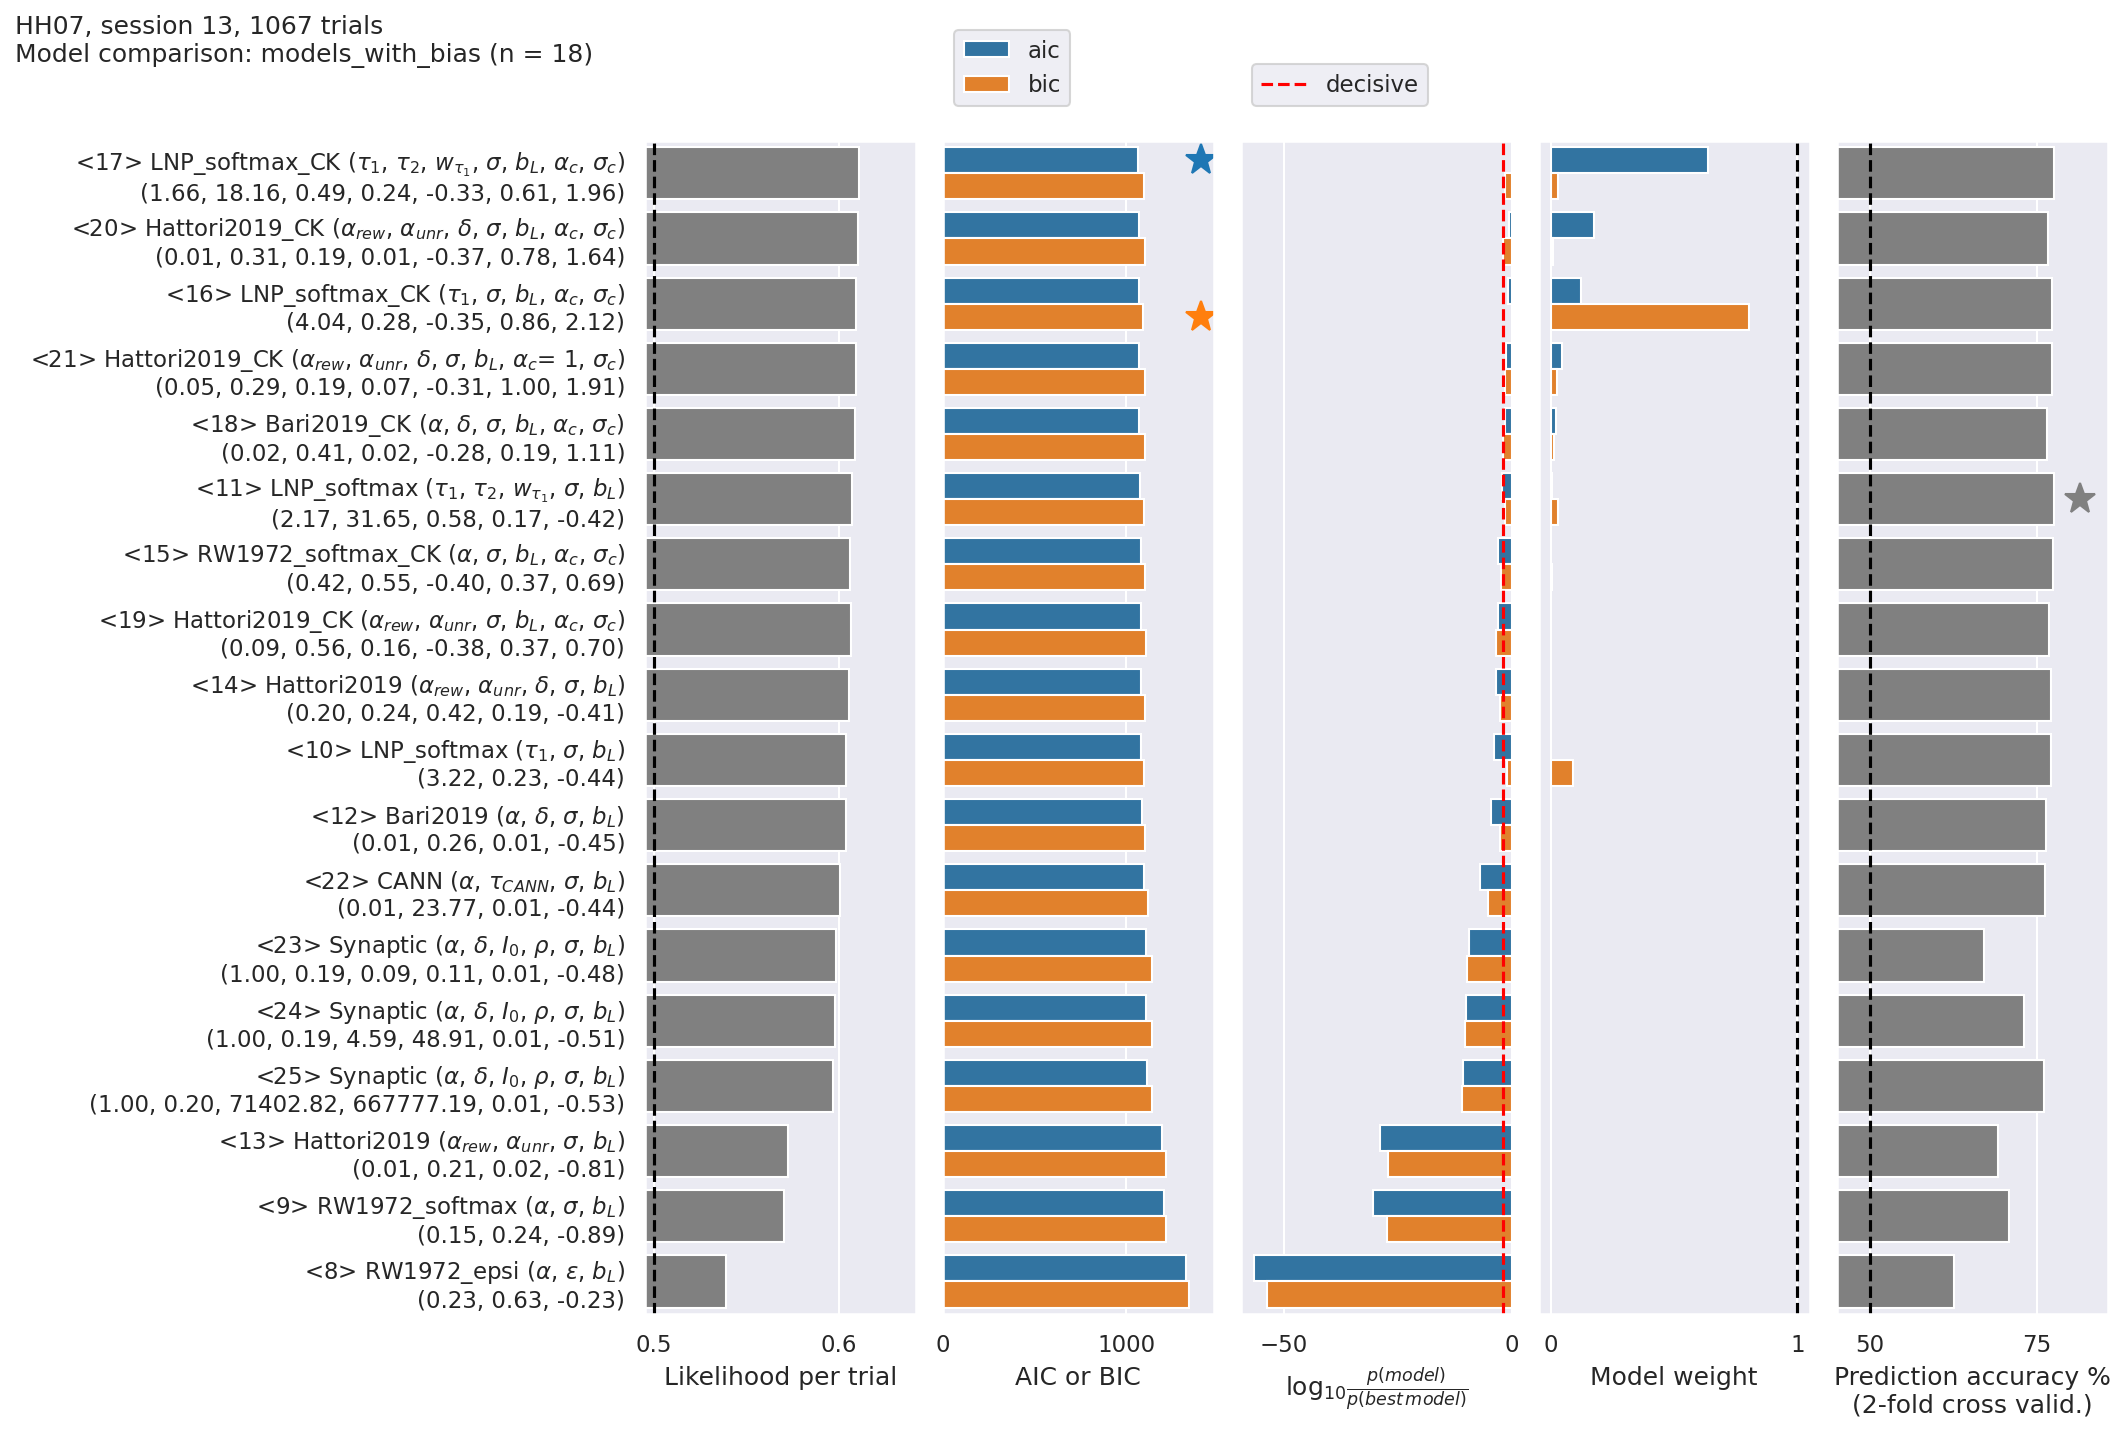

In [7]:
sess_key = {'subject_id': 472184, 'session': 13}
plot_session_model_comparison(sess_key, model_comparison_idx=1, sort='aic')

Raw fitted results

In [ ]:
foraging_model.Model.proj('model_notation') * (foraging_model.FittedSessionModel & sess_key) 

Plot fitted choice traces of best and worst models

In [9]:
%matplotlib qt5
_ = plot_session_fitted_choice(sess_key=sess_key, first_n=1, last_n=2, smooth_factor=10, model_comparison_idx=1)

Plot specified models

CANN model (22), Synaptic (23), and Hattori (14)

In [ ]:
_ = plot_session_fitted_choice(sess_key=sess_key, specified_model_ids=[22, 24, 14], smooth_factor=10)

## Query of fitted params

All fitted params are stored in the part table `foraging_model.FittedSessionModel.Param`

In [ ]:
foraging_model.FittedSessionModel.Param.heading

Models from Ulises

In [ ]:
Ulises_model = (foraging_model.Model & 'model_class in ("CANN", "Synaptic")')
Ulises_model

Show fit command

In [ ]:
Ulises_model.fetch('fit_cmd')

Note the different bounds of $I_0$ and $\rho$ of the three Synaptic models.<br>
- `model_id = 23` --> $0 < I_0 < 10, 0 < \rho < 1$
- `model_id = 24` --> $0 < I_0 < 10, -100 < \rho < 100$
- `model_id = 25` --> $0 < I_0 < 1e6, -1e6 < \rho < 1e6$ (basically unconstrained)

Say, we're interested in the fully unconstrained Synaptic model (`model_id = 25`)

In [ ]:
model_id = 25

Query ALL fitted params for one session

In [ ]:
# From foraging_model.Model, we know model_id 24 is the Synaptic model
foraging_model.FittedSessionModel.Param & {'subject_id': 482350, 'session': 52, 'model_id': model_id}

Quecy one fitted parmas, say, the `forget_rate`, for All sessions 

In [ ]:
foraging_model.FittedSessionModel.Param & {'model_param': 'forget_rate', 'model_id': model_id}

Plot distributions of fitted params (`learn_rate` and `tau` of the RNN model)

In [ ]:
model_id = 22
params = ['learn_rate', 'tau_cann']
fig, axs = plt.subplots(1, len(params), figsize=(5 * len(params), 5))

for ax, param in zip(axs, params):
    q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
    ax.hist(q, 100)
    ax.set_xlabel(param)

## Problems in Synaptic model?

For `model_id = 23`,  Some fitted $\rho$s are at the boundary 0 and 1

- `model_id = 23` --> $0 < I_0 < 10, 0 < \rho < 1$

In [ ]:
model_id = 23
params = ['learn_rate', 'forget_rate', 'I0', 'rho']
fig, axs = plt.subplots(1, len(params), figsize=(5 * len(params), 5))

for ax, param in zip(axs, params):
    q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
    ax.hist(q, 100)
    ax.set_xlabel(param)

- `model_id = 24` --> $0 < I_0 < 10, -100 < \rho < 100$

In [ ]:
model_id = 24
params = ['learn_rate', 'forget_rate', 'I0', 'rho']
fig, axs = plt.subplots(1, len(params), figsize=(5 * len(params), 5))

for ax, param in zip(axs, params):
    q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
    ax.hist(q, 100)
    ax.set_xlabel(param)

- `model_id = 25` --> $0 < I_0 < 1e6, -1e6 < \rho < 1e6$ (basically unconstrained)

$\rho$ is clearly problematic if unconstrained...

In [ ]:
model_id = 25
params = ['learn_rate', 'forget_rate', 'I0', 'rho']
fig, axs = plt.subplots(1, len(params), figsize=(5 * len(params), 5))

for ax, param in zip(axs, params):
    q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
    ax.hist(q, 100)
    ax.set_xlabel(param)

In the following example, `model_id=23` failed, but `24` and `25` look fine, although there's a clear overfitting in `25` (huge $I_0$ and $\rho$)

In [ ]:
key = (experiment.Session & (foraging_model.FittedSessionModel & 'model_id = 23')).fetch('KEY', limit=1, offset=9)[0]
plot_session_fitted_choice(key, specified_model_ids=[9, 22, 23, 24, 25])

### Find good example session for Ulises

<AxesSubplot:xlabel='Trial number (finished trials only)'>

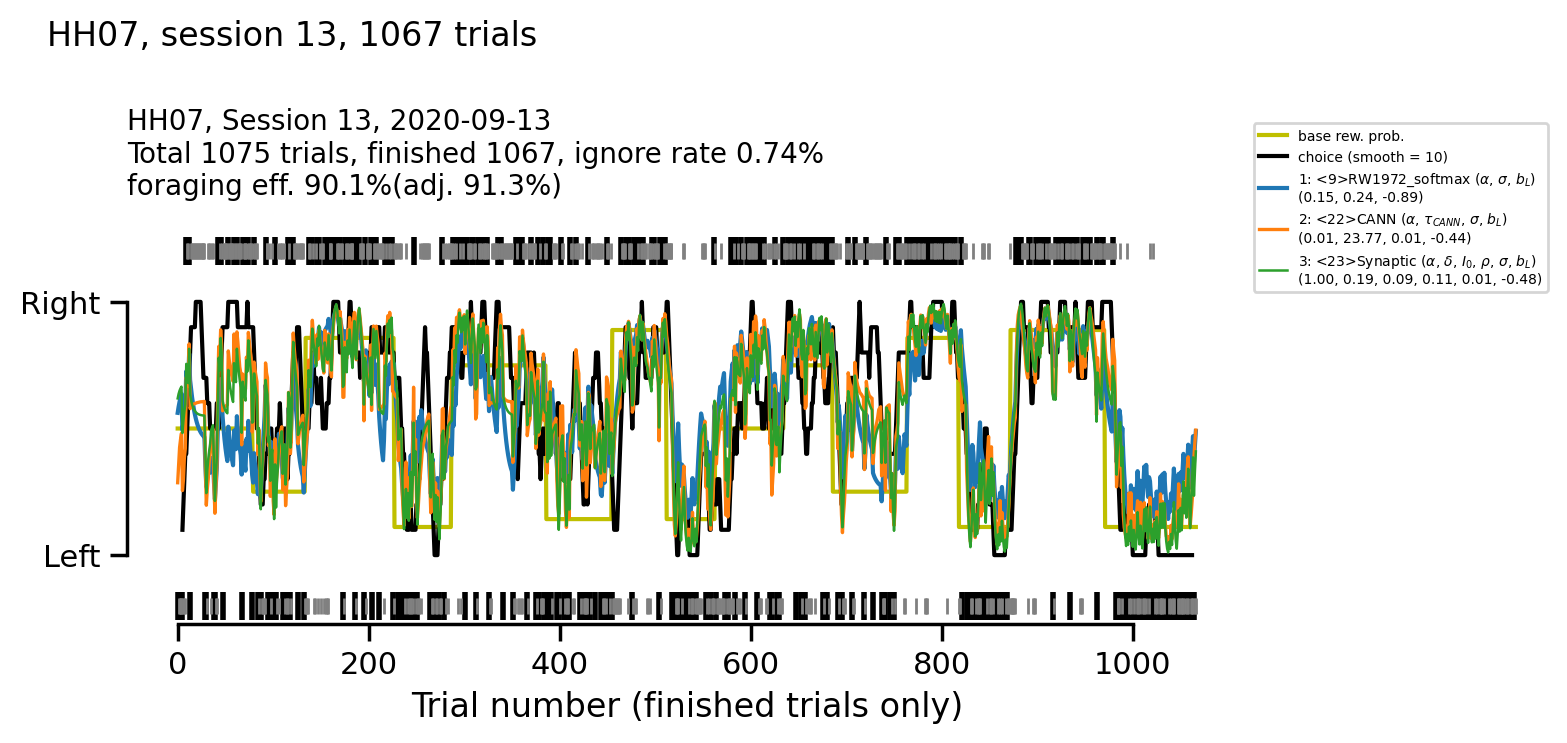

In [27]:
session = experiment.Session & (lab.WaterRestriction & 'water_restriction_number = "HH07"') & 'session = 13' 
plot_session_fitted_choice(sess_key=session.fetch1('KEY'), specified_model_ids=[9, 22, 23], smooth_factor=10)

## Compare models by AIC

Here I'm comparing overal fitting qualities of five models

`lpt_aic` is the likelihood per trial with AIC penality (the larger, the better)

In [ ]:
model_ids = [9, 22, 23, 24, 25]
_, ax = plt.subplots(1, 1, figsize=(10, 10))

for model_id in model_ids:
    lpt_aic = (foraging_model.FittedSessionModel & {'model_id': model_id}).fetch('lpt_aic')
    cnt, bin = np.histogram(lpt_aic, bins=100)
    plt.plot(bin[:-1], np.cumsum(cnt), lw=3, label=(foraging_model.Model & {'model_id': model_id}).fetch('desc'))

ax.set(xlabel='likelihood per trial (aic penality)', ylabel='cumulative prob')
_ = ax.legend(bbox_to_anchor=[1, 1])    

Conclusion:
1. `CANN` is better than `SuttonBarto` (which is the same as `CANN` except the ITI-dependent decay)
2. Mildly constrained Synaptic model `24` (red) is better than tightly constrained `23` (green) or unconstrained `25` (purple) models.

In [26]:
sess_key = {'subject_id': 473361, 'session': 46}

# Retrieve fitted latent variables

## Action value

In current model fitting pipeline, `action value` and `choice probability` of each trial have been saved in part table `TrialLatentVariable` by default.

In [12]:
foraging_model.FittedSessionModel.TrialLatentVariable.heading

# 
subject_id           : int                          # institution 6 digit animal ID
session              : smallint                     # session number
model_id             : int                          # 
trial                : smallint                     # trial number (1-based indexing)
water_port           : varchar(16)                  # e.g. left, right, middle, top-left, purple
---
action_value=null    : float                        # 
choice_prob=null     : float                        # 
choice_kernel=null   : float                        # 

In [ ]:
latent_variables = foraging_model.FittedSessionModel.TrialLatentVariable & sess_key & 'model_id = 21'
latent_variables

In [ ]:
latent_variables * experiment.BehaviorTrial * experiment.WaterPortChoice.proj(choice='water_port') & 'choice = "right"' & 'outcome = "hit"'

In [97]:
sess_key = {'subject_id': 473361, 'session': 46}

In [ ]:
latent_variables = foraging_model.FittedSessionModel.TrialLatentVariable & sess_key & 'model_id = 22'
(experiment.BehaviorTrial & sess_key ) - latent_variables

In [93]:
dj.U('subject_id', 'session') & (((experiment.BehaviorTrial & sess_key) - (foraging_model.FittedSessionModel.TrialLatentVariable & 'model_id = 22' & sess_key)) & 'outcome != "ignore"')

*subject_id    *session   
+------------+ +---------+
473361         46         
 (Total: 1)

In [ ]:
all_22 = dj.U('subject_id', 'session') &  (foraging_model.FittedSessionModel.TrialLatentVariable & 'model_id = 22')
all_22 * lab.WaterRestriction

In [ ]:
experiment.BehaviorTrial & sess_key & 'outcome="ignore"'

In [14]:
experiment.WaterPortChoice.heading

# The water port selected by the animal for each trial
subject_id           : int                          # institution 6 digit animal ID
session              : smallint                     # session number
trial                : smallint                     # trial number (1-based indexing)
---
water_port=null      : varchar(16)                  # e.g. left, right, middle, top-left, purple

So we can plot the fitted `action values` (red and green, on left axis) together with the fitted choice probability (blue).

For the synaptic model, `action values` = $u_L$ and $u_R$

In [ ]:
right_action_value = (latent_variables & 'water_port = "right"').fetch('action_value')
left_action_value = (latent_variables & 'water_port = "left"').fetch('action_value')

ax = plot_session_fitted_choice(sess_key=sess_key, specified_model_ids=24, smooth_factor=10)
ax2 = ax.twinx()
ax2.plot(right_action_value, 'g', label='right action value')
ax2.plot(left_action_value, 'r', label='left action value')
ax2.set_ylabel('action value')
ax2.legend(fontsize=7)

## $w_L(k)$ and $w_R(k)$

Unfortunately, I didn't save $w(k)$ in the latent variable table. But we can recompute them by simulating the fitted model again.

In [ ]:
def plot_fitted_synaptic_w(sess_key, synaptic_model_id=24):
    # Retrieve fitted parameters
    fitted_para = (foraging_model.FittedSessionModel.Param & sess_key & f'model_id = {synaptic_model_id}').fetch()
    model_name = (foraging_model.Model & f'model_id = {synaptic_model_id}').fetch1('model_class')
    params = {name: value for (_, _, _, name, value) in fitted_para}

    # Retrieve choice and reward history
    choice_history, reward_history, iti, p_reward, q_choice_outcome = foraging_model.get_session_history(sess_key)

    # Rerun the model
    from pipeline.model.bandit_model import BanditModel
    model = BanditModel(forager=model_name, **params, fit_choice_history=choice_history, fit_reward_history=reward_history)
    model.simulate()
    
    # Plot the fitted w and the fitted choice
    w_L, w_R = model.w

    ax = plot_session_fitted_choice(sess_key=sess_key, specified_model_ids=synaptic_model_id, smooth_factor=10)
    ax2 = ax.twinx()
    ax2.plot(w_R, 'g', label='$w_R$', lw=1)
    ax2.plot(w_L, 'r', label='$w_L$', lw=1)
    ax2.set_ylabel('w')
    ax2.legend(fontsize=10)

Call this function with any session and any synaptic model.

The following two figures are model 23 and 24 using the same session.

In [ ]:
plot_fitted_synaptic_w(sess_key={'subject_id': 447921, 'session': 12}, synaptic_model_id=23)

In [ ]:
plot_fitted_synaptic_w(sess_key={'subject_id': 447921, 'session': 12}, synaptic_model_id=24)

In [13]:
from pipeline.plot import foraging_plot

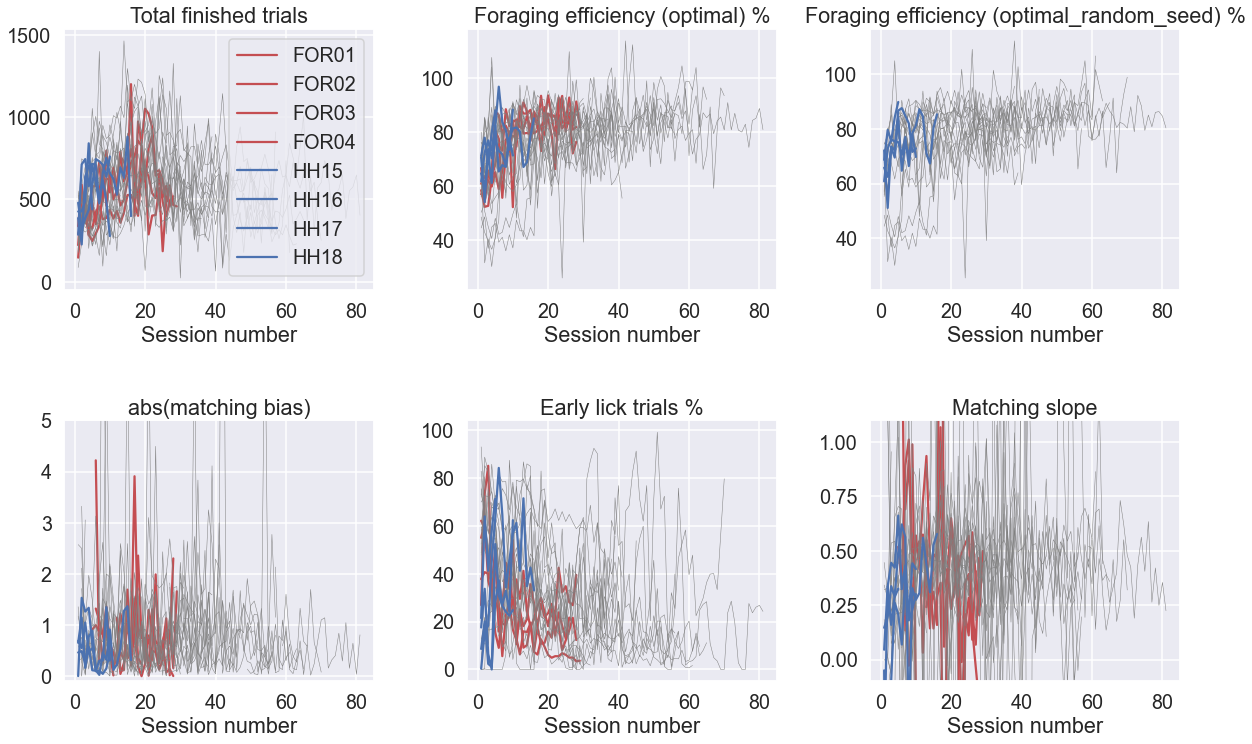

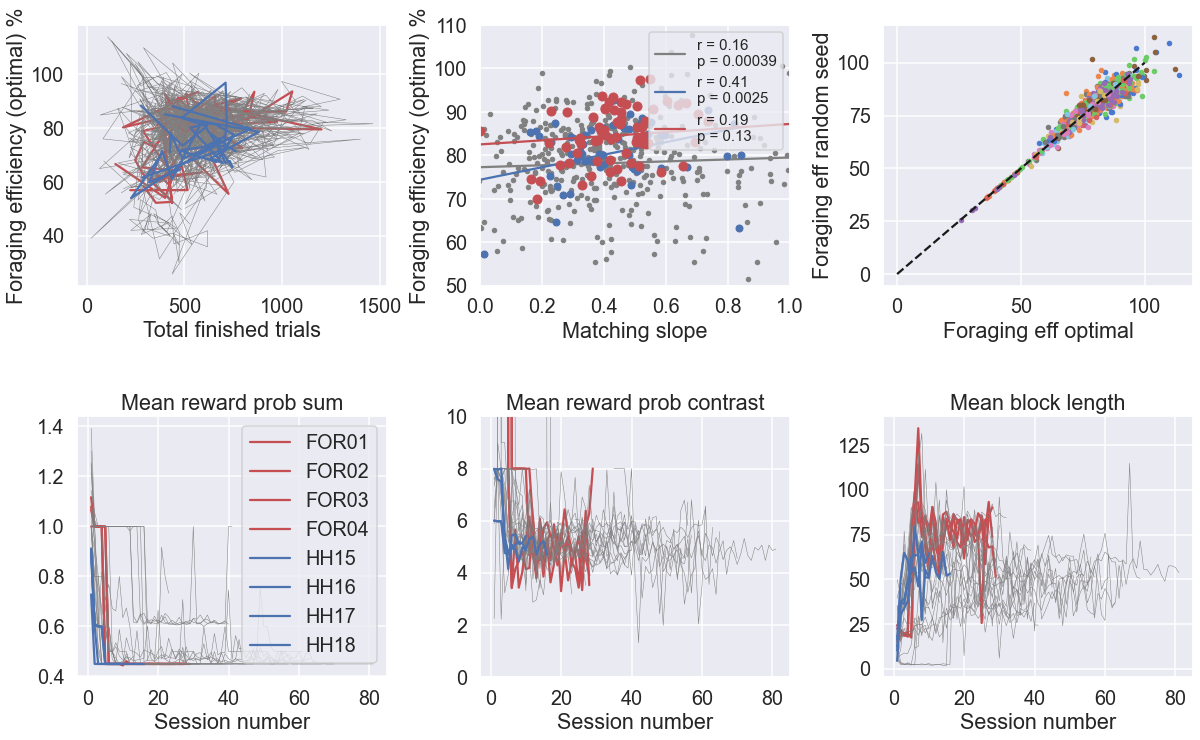

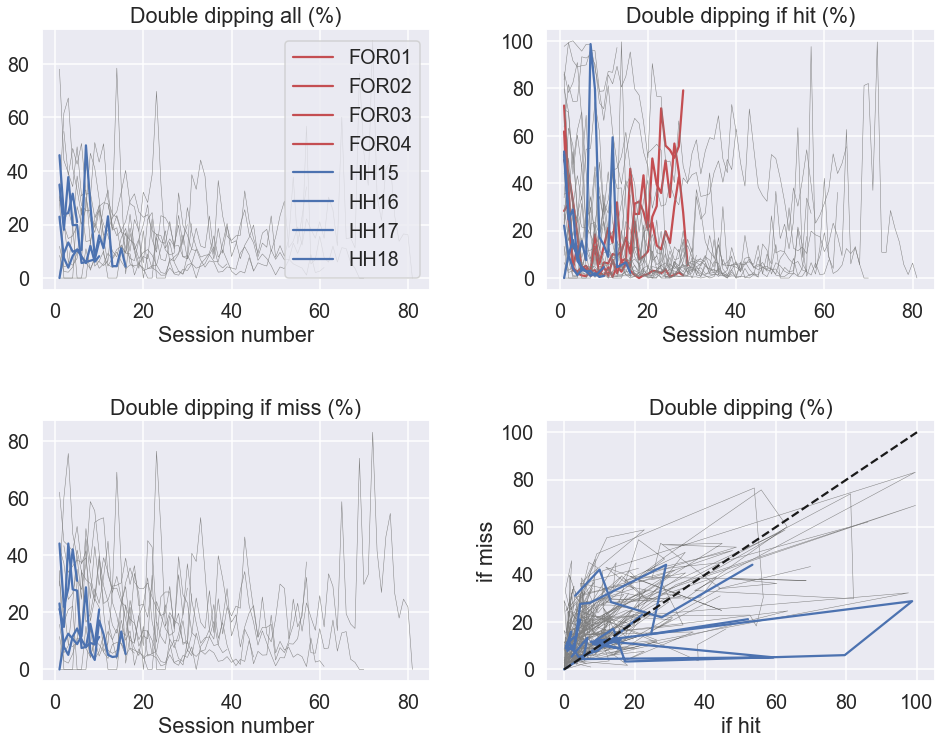

In [15]:
foraging_plot.plot_training_summary()